## Long Short-Term Memory 
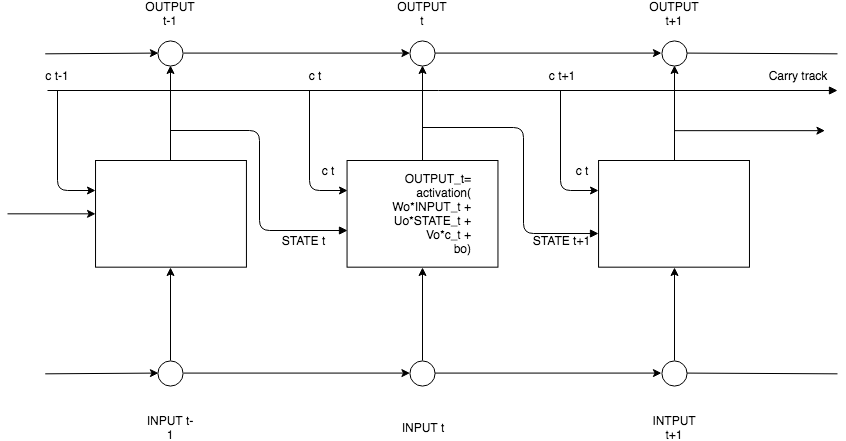

The way the next value of the carry dataflow is computed: It involves three distinct transformations. All have the form a `SimpleRNN` cell.
`y = activation(dot(state_t, U) + dot(input_t, W) + b)`

But all three transformations have their own weight matrices, which we'll index with the letters `i`, `f` and `k`.

Pseudocode details of the LSTM Architecture (1/2)
```
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
```
We obtain the next carry state the next `c_t` by combining `i_t`, `f_t` and `k_t`.
```
c_t+1 = i_t * k_t + c_t * f_t
```

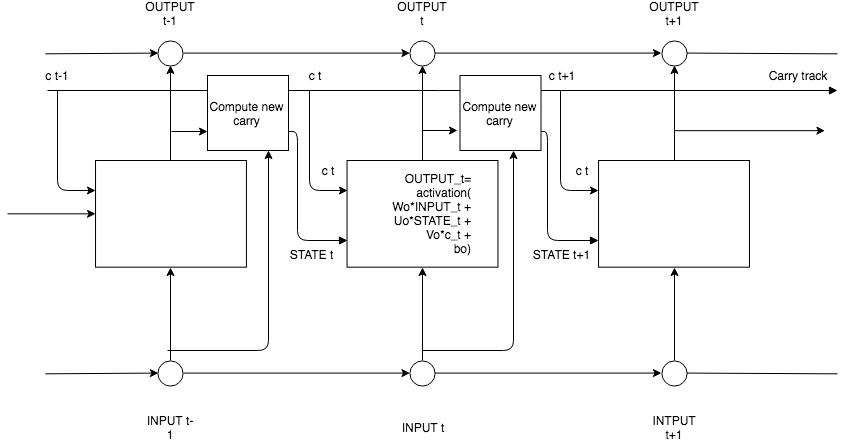

### Concrete example with IMDB

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500 # Number of words to consider as features
batch_size = 32 # Cuts off texts after this many words (among the max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.4946 - acc: 0.7719 - val_loss: 0.3543 - val_acc: 0.8564
Epoch 2/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.3074 - acc: 0.8792 - val_loss: 0.3515 - val_acc: 0.8442
Epoch 3/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2374 - acc: 0.9111 - val_loss: 0.3357 - val_acc: 0.8736
Epoch 4/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2017 - acc: 0.9254 - val_loss: 0.2891 - val_acc: 0.8798
Epoch 5/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1760 - acc: 0.9353 - val_loss: 0.3135 - val_acc: 0.8862
Epoch 6/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1636 - acc: 0.9430 - val_loss: 0.4086 - val_acc: 0.8214
Epoch 7/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1457 - acc: 0.9478 - val_loss: 0.3099 - v

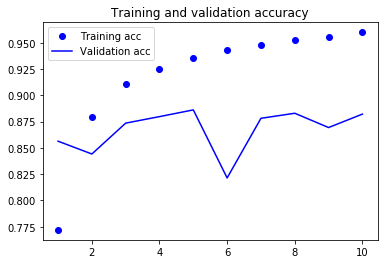

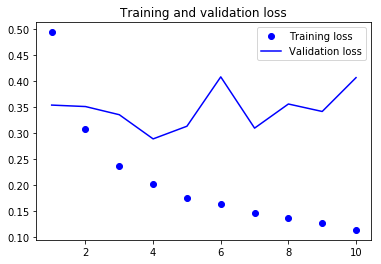

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()